## 1. Import libraries



In [25]:
# #  Import the necessary liabraries  
# import pandas as pd
# #from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.neural_network import MLPClassifier  # Import the MLPClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# # from imblearn.over_sampling import SMOTE

# from sklearn.neighbors import KNeighborsClassifier

# # SHAP and LIME library for explanability of the EPC label classifications
# import shap  
# # import lime
# # import lime.lime_tabular


# import matplotlib.pyplot as plt
# from matplotlib import colors
# import numpy as np
# import re  # regular expressions


# import seaborn as sns

# # for deep explainer NN
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# from sklearn.tree import DecisionTreeClassifier
# from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.optimizers import Adam

# from sklearn.ensemble import RandomForestClassifier
# # from pdpbox import pdp
# from sklearn.decomposition import PCA


# import xgboost as xgb

# # Import additional libraries for clustering
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score



# Import Dataset

In [26]:
import pandas as pd
import os
import requests

# Define the filename and the URL to download the dataset
filename = "energy_efficiency_certificates.csv"
url = "https://analisi.transparenciacatalunya.cat/api/views/j6ii-t3w2/rows.csv?accessType=DOWNLOAD"

# Check if the file already exists locally
if not os.path.exists(filename):
    # If not, download the file from the URL
    response = requests.get(url)
    # Save the downloaded content to a local CSV file
    with open(filename, "wb") as f:
        f.write(response.content)
    # Load the CSV into a pandas DataFrame
    df_energy = pd.read_csv(filename)
else:
    # If the file exists, load it directly into a pandas DataFrame
    df_energy = pd.read_csv(filename)


# Load the schema with the English column names
schema_df = pd.read_csv('dataset_schema.csv')

# Rename columns in df_energy because the orginal is not in English
df_energy.columns = schema_df['Column Name']

C:\Users\u13208366\AppData\Local\Temp\ipykernel_21452\3044401054.py:20: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df_energy = pd.read_csv(filename)


## Dataset exploration

In [27]:
df_energy

Column Name,NUM_CASE,ADDRESS,NUMBER,SCALE,APARTMENT,DOOR,POSTAL_CODE,POPULATION,REGION,NAME_PROVINCE,...,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE,GEOREFERENCE,ENERGY_REHABILITATION,REHABILITATION_ACTIONS,ENTRY_DATE
0,2103STTDZ,Carrer OM,13,NaN,NaN,NaN,8650.0,Sallent,Bages,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/04/2015
1,BHDLM04GZ,Partida CAPARRELLA,77,NaN,NaN,NaN,25192.0,Lleida,Segrià,Lleida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2015
2,L4HJTXJHF,Carrer VEREMA,4,NaN,NaN,NaN,17493.0,Vilajuïga,Alt Empordà,Girona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/06/2015
3,0FZ88B8FX,Ronda FERRAN PUIG,17,NaN,NaN,NaN,17001.0,Girona,Gironès,Girona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/07/2015
4,R6ZGPQV7T,Camí Marganell a Montserrat,107,NaN,NaN,NaN,8298.0,Marganell,Bages,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/08/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340357,5KG95J0GL,Carrer Andreu Soler,9,NaN,4,3,8930.0,Sant Adrià de Besòs,Barcelonès,Barcelona,...,120.18,D,10.38,NaN,2.218195,41.432345,POINT (2.21819490766 41.432344774775),NO,NaN,18/07/2019
1340358,YQNLZZ0C5,Carrer COMTES DE BELL·LLOC,144,NaN,2,4,8014.0,Barcelona,Barcelonès,Barcelona,...,65.42,A,0.99,0.63,2.136314,41.382323,POINT (2.136314316302 41.382323041997),NO,NaN,21/05/2018
1340359,6LSSPS7JJ,Carrer Francesc Camprodon,83,NaN,1,1,17401.0,Arbúcies,Selva,Girona,...,42.45,B,2.42,NaN,2.517223,41.815067,POINT (2.517223165429 41.815067252326),NO,NaN,27/01/2021
1340360,2RL2YQ0LP,Carrer Igualtat,26,NaN,4,2,8902.0,Hospitalet de Llobregat (L'),Barcelonès,Barcelona,...,100.61,B,2.19,NaN,2.125328,41.360689,POINT (2.125327822606 41.36068910736),NO,NaN,07/02/2023


In [28]:
from IPython.display import display, HTML

display(HTML(df_energy.describe().to_html(max_cols=None)))


Column Name,POSTAL_CODE,POPULATION_CODE,COUNTY_CODE,PROVINCE_CODE,CADASTRE_METERS,YEAR_BUILT,Non-renewable primary energy,CO2 emissions,Final energy consumption,Approximate annual energy cost per home,INSULATION VALUE,WINDOWS VALUE,CTE INSULATION VALUE,CTE WINDOWS VALUE,UTM_X,UTM_Y,Heating emissions,Cooling emissions,DHW emissions,Lighting emissions,Heating energy,Cooling energy,DHW energy,Lighting energy,Heating energy demand,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE
count,1.340359e+06,1.340362e+06,1.340345e+06,1.340362e+06,1.340362e+06,315.000000,1.340268e+06,1.340273e+06,1.312985e+06,1.312985e+06,1.312985e+06,1.312985e+06,1.340362e+06,1.340362e+06,1.320747e+06,1.320747e+06,1.275623e+06,1.275622e+06,1.275623e+06,1.239765e+06,1.275622e+06,1.275502e+06,1.275622e+06,1.256570e+06,1.275626e+06,1.275309e+06,400166.000000,1.320747e+06,1.320747e+06
mean,1.474429e+04,1.447871e+04,1.969038e+01,1.435497e+01,1.406616e+02,1978.177778,2.095832e+02,4.322454e+01,1.350992e+02,8.073199e+02,1.484302e+00,1.839359e+05,4.704892e-01,2.020110e+00,4.198829e+05,4.596106e+06,2.942279e+01,1.482249e+00,1.036784e+01,9.520949e-01,1.423969e+02,8.748809e+00,5.346164e+01,5.558677e+00,9.974132e+01,8.076066e+00,0.672681,2.041323e+00,4.151126e+01
std,1.178219e+04,1.174187e+04,1.206908e+01,1.172146e+01,8.415132e+02,43.794106,2.347864e+02,1.347190e+02,1.272860e+02,9.377441e+03,7.736847e-01,4.284785e+06,7.819671e-02,3.190249e-01,4.647718e+04,3.275928e+04,1.893315e+01,1.940395e+00,1.881079e+01,8.657774e+00,8.849597e+01,1.144981e+01,1.091972e+02,5.159574e+01,4.953151e+01,8.942642e+00,0.142989,5.547672e-01,2.974310e-01
min,1.001000e+03,8.001000e+03,1.000000e+00,8.000000e+00,1.000000e+00,1400.000000,-4.821000e+01,-8.170000e+00,-1.237500e+02,-2.441690e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.687565e+05,4.489509e+06,0.000000e+00,0.000000e+00,-8.600000e-01,-1.689000e+01,0.000000e+00,-4.730000e+00,-5.060000e+00,-9.971000e+01,0.000000e+00,0.000000e+00,0.000000,2.500650e-01,4.052962e+01
25%,8.172000e+03,8.019000e+03,1.200000e+01,8.000000e+00,5.800000e+01,1968.500000,1.452500e+02,2.923000e+01,7.834000e+01,8.660000e+00,7.300000e-01,3.440000e+00,4.900000e-01,2.100000e+00,4.070238e+05,4.580660e+06,1.782000e+01,5.900000e-01,5.620000e+00,0.000000e+00,8.935000e+01,3.460000e+00,2.701000e+01,0.000000e+00,6.634000e+01,3.410000e+00,0.630000,1.879849e+00,4.137402e+01
50%,8.695000e+03,8.187000e+03,1.300000e+01,8.000000e+00,7.500000e+01,1982.000000,1.947500e+02,3.943000e+01,1.313800e+02,1.457000e+01,1.690000e+00,3.780000e+00,4.900000e-01,2.100000e+00,4.279962e+05,4.588443e+06,2.631000e+01,1.030000e+00,9.410000e+00,0.000000e+00,1.292800e+02,6.070000e+00,4.628000e+01,0.000000e+00,9.249000e+01,5.800000e+00,0.630000,2.138590e+00,4.144442e+01
75%,1.725300e+04,1.707900e+04,3.300000e+01,1.700000e+01,1.041200e+02,2003.000000,2.541500e+02,5.173000e+01,1.819200e+02,4.546900e+02,2.030000e+00,5.000000e+00,4.900000e-01,2.100000e+00,4.351719e+05,4.607609e+06,3.732000e+01,1.870000e+00,1.361000e+01,0.000000e+00,1.809100e+02,1.104000e+01,6.912000e+01,0.000000e+00,1.258500e+02,1.040000e+01,0.630000,2.223363e+00,4.161408e+01
max,5.225000e+04,4.390700e+04,4.200000e+01,4.300000e+01,3.577920e+05,2017.000000,9.653508e+04,6.039300e+04,4.006808e+04,5.300219e+06,1.000000e+02,1.000000e+08,5.600000e-01,2.300000e+00,5.244708e+05,4.745406e+06,3.543600e+03,5.824200e+02,1.222272e+04,2.652240e+03,2.091903e+04,3.438240e+03,7.215464e+04,1.565701e+04,3.622300e+03,1.573100e+03,10.000000,3.296821e+00,4.283890e+01


# Dataset description

In [29]:
from IPython.display import display, HTML

display(HTML(schema_df.to_html(max_rows=None, max_cols=None)))


,Column Name,Description,API Field Name,Data Type
0,NUM_CASE,Energy efficiency certificate procedure identifier,case_number,Text
1,ADDRESS,Street name,address,Text
2,NUMBER,Street number,number,Text
3,SCALE,Scale,scale,Text
4,APARTMENT,Apartment,floor,Text
5,DOOR,Door,door,Text
6,POSTAL_CODE,Postal code,postal_code,Text
7,POPULATION,Municipality (according to the table of municipalities of Catalonia from Idescat),population,Text
8,REGION,County (according to the table of counties of Catalonia and the singular territorial entity of Aran de l'Idescat),region,Text
9,NAME_PROVINCE,Province,province_name,Text


In [30]:
df_energy["Certification tool"].value_counts(dropna=False).to_frame('Count').reset_index().rename(columns={'index': 'Certification tool'})

,Certification tool,Count
0,CE3X,1280619
1,CE3,33931
2,CERMA,10695
3,HULC,10090
4,CYPE,2692
5,CALENER VYP,1579
6,TeKton3D TK-CEEP,291
7,SG SAVE,144
8,CALENER GT,108
9,CE2,93


In [31]:
df_energy["CLIMATIC ZONE"].value_counts(dropna=False).to_frame('Count').reset_index().rename(columns={'index': 'CLIMATIC ZONE'})
	

,CLIMATIC ZONE,Count
0,C2,918333
1,D2,119302
2,B3,93932
3,C3,72751
4,D3,50160
5,D1,31570
6,NaN,27369
7,E1,26945


In [32]:
df_energy["US_BUILDING"].value_counts(dropna=False).to_frame('Count').reset_index().rename(columns={'index': 'US_BUILDING'})
# you might need to translate the information to English


,US_BUILDING,Count
0,Habitatge individual en bloc d'habitatges,803236
1,Habitatge unifamiliar,255578
2,Terciari,106323
3,Vivienda individual en bloque de viviendas,98706
4,Vivienda unifamiliar,31220
5,Bloc d'habitatges plurifamiliar,17048
6,Terciario,15071
7,Bloc d'habitatges,10518
8,Bloque de viviendas plurifamiliar,1378
9,Bloque de viviendas,1283


In [33]:
# Count the number of text and number variables in schema_df
text_count = (schema_df['Data Type'].str.lower() == 'text').sum()
number_count = (schema_df['Data Type'].str.lower() == 'number').sum()

print(f"Number of text variables: {text_count}")
print(f"Number of number variables: {number_count}")

Number of text variables: 43
Number of number variables: 24


Many variables in the dataset are **textual (categorical)** in nature—for example, variables like the **type of housing**, **municipality name**, or **energy certification ratings**. While these variables contain meaningful information that could significantly improve the performance of a machine learning model, they **cannot be directly processed by most algorithms**, which expect **numerical input**.

To make this data usable, we need to apply **encoding techniques** that convert these text values into numbers. Common methods include:

- **Label Encoding**:  
  Assigns a unique integer to each category (e.g., `"Barcelona"` → `0`, `"Girona"` → `1`).  
  Suitable for ordinal variables but can mislead models if the categories have no natural order.

- **One-Hot Encoding**:  
  Creates a new binary column for each category (e.g., `"Solar Photovoltaic"` becomes a column with values `0` or `1`).  
  This avoids introducing false ordinal relationships but increases dimensionality.

- **Target or Frequency Encoding**:  
  Replaces categories with statistics derived from the target variable or frequency of occurrence.  
  Useful when dealing with high-cardinality categorical features.

By converting text-based data into numerical formats, we ensure that **machine learning algorithms can interpret and learn from all available information**, including human-readable labels that carry important contextual meaning.


## Lets check the quality of the data - Missing values

In [34]:
from IPython.display import display, HTML

# Calculate missing values as a percentage of total rows
total_rows = df_energy.shape[0]
missing_percentage = (df_energy.isnull().sum() / total_rows * 100).round(2) if total_rows > 0 else df_energy.isnull().sum()
missing_df = pd.DataFrame({
    'Missing Values': df_energy.isnull().sum(),
    'Missing (%)': missing_percentage
})

display(HTML(missing_df.to_html()))


,Missing Values,Missing (%)
Column Name,,
NUM_CASE,0,0.00
ADDRESS,0,0.00
NUMBER,55,0.00
SCALE,1063975,79.38
APARTMENT,338923,25.29
DOOR,389388,29.05
POSTAL_CODE,3,0.00
POPULATION,0,0.00
REGION,0,0.00


There a few variables that have mostly empty values. If we want to remove missing values and these features are present in the dataset, then we will remove almost all the rows. So let's get rid of these features first. We select an arbitrary threshold of 10% missing values. If a feature has more than 10% missing values, we will remove it from the dataset.

In [35]:
# Threshold for dropping
threshold = 10.0

# Identify features with >10% missing values
features_to_drop = missing_df[missing_df['Missing (%)'] > threshold]

# Display table of features to be dropped
if not features_to_drop.empty:
    display(HTML(f"<h4>Features with >{threshold}% Missing Values</h4>"))
    display(HTML(features_to_drop.to_html()))
else:
    print(f"No features with more than {threshold}% missing values.")

# Drop the columns from the DataFrame
df_energy = df_energy.drop(columns=features_to_drop.index.tolist())


,Missing Values,Missing (%)
Column Name,,
SCALE,1063975,79.38
APARTMENT,338923,25.29
DOOR,389388,29.05
YEAR_BUILT,1340047,99.98
ELECTRIC VEHICLE,320403,23.90
DISTRICT NETWORK,320403,23.90
BUILDING_TECHNICAL_INSTALLATION_REPORT,1335026,99.60
TYPE_TERTIARY,1218972,90.94
Lighting emissions qualification,1245787,92.94


Ideally we would like know which features are the least important so that we can remove them too before throwing away data with missing values. This would require some feature selection. We'll leave that for a later exercise. For now, let's just remove all the missing values

In [36]:
print("Number of rows before dropping missing values:", df_energy.shape[0])
df_energy.dropna(inplace=True)  # Drop rows with missing values
print("Number of rows after dropping missing values:", df_energy.shape[0])

Number of rows before dropping missing values: 1340362
Number of rows after dropping missing values: 1121447


Lets try to encode the categorical features. Lets first see how many unique values each feature has. 


In [37]:
# Show only text (categorical) columns and their number of unique values
text_unique_counts = {col: len(label_encoders[col].classes_) for col in categorical_cols}
text_unique_df = pd.DataFrame(list(text_unique_counts.items()), columns=['Column', 'Unique Values']).sort_values('Unique Values', ascending=False)
display(text_unique_df)


,Column,Unique Values
0,NUM_CASE,1121447
6,CADASTRAL REFERENCE,998374
27,GEOREFERENCE,378748
1,ADDRESS,178899
28,ENTRY_DATE,3601
2,NUMBER,1679
3,POPULATION,1139
4,REGION,65
16,Reason for certification,36
15,Certification tool,14


In [38]:
from sklearn.preprocessing import LabelEncoder

# Find all categorical columns again
categorical_cols = df_energy.select_dtypes(include=['object', 'category', 'string']).columns

# Initialize mapping dictionary
label_encoders = {}

# Apply LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_energy[col] = le.fit_transform(df_energy[col].astype(str))
    label_encoders[col] = le

# Confirm
display(HTML(df_energy.head().to_html()))
print(f"Encoded {len(label_encoders)} columns.")


Column Name,NUM_CASE,ADDRESS,NUMBER,POSTAL_CODE,POPULATION,REGION,NAME_PROVINCE,POPULATION_CODE,COUNTY_CODE,PROVINCE_CODE,CADASTRAL REFERENCE,CLIMATIC ZONE,CADASTRE_METERS,US_BUILDING,Non-renewable primary energy consumption rating,Non-renewable primary energy,Qualification of CO2 emissions,CO2 emissions,Final energy consumption,Approximate annual energy cost per home,SOLAR THERMAL,SOLAR PHOTOVOLTAIC,BIOMASS SYSTEM,GEOTHERMAL ENERGY,Certification tool,INSULATION VALUE,WINDOWS VALUE,Reason for certification,CTE INSULATION VALUE,CTE WINDOWS VALUE,UTM_X,UTM_Y,Construction regulations,Procedure Type,Heating emissions qualification,Heating emissions,Cooling emissions qualification,Cooling emissions,ACS emissions qualification,DHW emissions,Lighting emissions,Heating energy qualification,Heating energy,Cooling energy qualification,Cooling energy,DHW energy qualification,DHW energy,Lighting energy,Heating energy demand qualification,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,LENGTH,LATITUDE,GEOREFERENCE,ENTRY_DATE
19799,727070,144795,725,43870.0,83,37,3,43014,22.0,43,588550,0,110.00,7,6,617.51,6,153.55,0.0,0.0,0,0,0,0,7,0.0,0.0,24,0.56,2.3,295292.01,4509681.08,7,1,5,51.88,0,0.99,5,6.90,0.0,4,196.66,1,5.86,4,26.17,0.0,4,121.93,1,6.00,0.576547,40.712623,8439,2447
19847,378897,173134,317,8800.0,1118,27,0,8307,17.0,8,387550,1,55.00,7,3,119.94,2,25.13,0.0,0.0,0,0,0,0,7,0.0,0.0,24,0.49,2.1,393412.24,4564142.00,7,1,4,24.04,0,0.28,6,0.81,0.0,5,113.50,0,1.67,6,4.77,0.0,6,87.75,0,1.71,1.728374,41.221647,91838,2012
19871,165550,56003,317,25005.0,483,51,2,25120,33.0,25,362017,5,393.00,7,2,178.18,2,44.31,0.0,0.0,0,0,0,0,7,0.0,0.0,24,0.41,1.8,303162.01,4610457.27,6,1,4,25.09,4,3.20,6,6.25,0.0,4,118.48,6,18.89,6,29.53,0.0,4,91.60,6,19.33,0.637263,41.621568,14841,3038
20028,696326,139635,873,8319.0,333,33,0,8075,21.0,8,388936,1,140.05,6,4,170.20,4,45.13,0.0,0.0,0,0,0,0,7,0.0,0.0,24,0.49,2.1,453552.50,4605352.05,7,1,4,35.07,0,0.03,4,4.86,0.0,4,165.61,0,0.16,6,22.97,0.0,4,97.30,0,0.12,2.442650,41.598521,302563,745
20106,921912,51623,781,8251.0,943,10,0,8192,7.0,8,401133,4,42.00,7,5,126.65,5,499.93,0.0,0.0,0,0,0,0,7,0.0,0.0,24,0.41,1.8,403583.00,4626532.02,1,1,3,13.73,3,2.13,4,4.49,0.0,4,81.04,4,12.58,5,21.19,0.0,3,40.65,3,6.65,1.839702,41.784784,109938,2939


Encoded 29 columns.


In [39]:
all_mappings = []

for col, le in label_encoders.items():
    for i, class_ in enumerate(le.classes_):
        all_mappings.append({
            'Column': col,
            'Encoded': i,
            'Original': class_
        })

mapping_df = pd.DataFrame(all_mappings)
display(mapping_df)


,Column,Encoded,Original
0,NUM_CASE,0,00000BXZ6
1,NUM_CASE,1,00001MJ49
2,NUM_CASE,2,00002WJYD
3,NUM_CASE,3,00003ZXFD
4,NUM_CASE,4,00006KJZ7
...,...,...,...
2684106,ENTRY_DATE,3596,31/12/2020
2684107,ENTRY_DATE,3597,31/12/2021
2684108,ENTRY_DATE,3598,31/12/2022
2684109,ENTRY_DATE,3599,31/12/2023


In [21]:
# Show only text (categorical) columns and their number of unique values
text_unique_counts = {col: len(label_encoders[col].classes_) for col in categorical_cols}
text_unique_df = pd.DataFrame(list(text_unique_counts.items()), columns=['Column', 'Unique Values']).sort_values('Unique Values', ascending=False)
display(text_unique_df)


,Column,Unique Values
0,NUM_CASE,1121447
6,CADASTRAL REFERENCE,998374
27,GEOREFERENCE,378748
1,ADDRESS,178899
28,ENTRY_DATE,3601
2,NUMBER,1679
3,POPULATION,1139
4,REGION,65
16,Reason for certification,36
15,Certification tool,14


### Dropping Features with Too Many Unique Categories

Some features in a dataset contain **text values** with **many unique categories**—for example, a column with hundreds of different building IDs or addresses.

While these might seem informative, they can actually **hurt model performance** for a few reasons:

- **Too much complexity**: Each unique category gets converted into a number which can make the dataset very large and hard for the model to learn from.
- **Overfitting risk**: If some categories appear only a few times, the model might learn patterns that don’t generalize well to new data.
- **Little predictive value**: In many cases, highly specific values (like building names or IDs) don’t help the model make better predictions.

To keep the model simple, fast, and effective, we remove these features **before training**—especially if they have hundreds or thousands of unique values.


In [43]:
from IPython.display import display, HTML

# Identify categorical columns with more than 15 unique values
high_cardinality_cols = [col for col, count in text_unique_counts.items() if count > 15]

display(HTML(f"<b>Columns with more than 15 unique values:</b> {high_cardinality_cols}"))

# Drop only columns that exist in df_energy
cols_to_drop = [col for col in high_cardinality_cols if col in df_energy.columns]
df_energy = df_energy.drop(columns=cols_to_drop)

# Show remaining columns
display(HTML(f"<b>Remaining columns:</b> {df_energy.columns.tolist()}"))

## Summary of the data processing steps

1. **Import dataset**: Downloaded and loaded the energy efficiency certificates dataset, and applied English column names using the provided schema.
2. **Initial exploration**: Explored the dataset, including descriptive statistics and value counts for key categorical features.
3. **Missing value analysis**: Calculated missing values for each feature and removed columns with more than 10% missing data.
4. **Remove rows with missing values**: Dropped all rows containing any remaining missing values to ensure a clean dataset.
5. **High cardinality feature removal**: Dropped categorical features with more than 15 unique values to reduce complexity and risk of overfitting.
6. **Categorical encoding**: Identified categorical columns and applied label encoding to convert text features into numeric codes.



These steps ensure the dataset is clean, relevant, and ready for robust machine learning analysis.

Next we can do some exploratory data analysis (EDA) to understand the data better. We can also do some feature engineering to create new features that might be useful for our model. For now, we can split the data into training and testing sets and train a machine learning model on the training set. We can then evaluate the model on the testing set and see how well it performs.

In [ ]:

display(HTML(df_energy.columns.to_frame().to_html(header=False)))

Column Name,
POSTAL_CODE,POSTAL_CODE
NAME_PROVINCE,NAME_PROVINCE
POPULATION_CODE,POPULATION_CODE
COUNTY_CODE,COUNTY_CODE
PROVINCE_CODE,PROVINCE_CODE
CLIMATIC ZONE,CLIMATIC ZONE
CADASTRE_METERS,CADASTRE_METERS
US_BUILDING,US_BUILDING
Non-renewable primary energy consumption rating,Non-renewable primary energy consumption rating
Non-renewable primary energy,Non-renewable primary energy


# Create train and test sets

In [ ]:
target_feature_name = ["Final energy consumption"]

# Select all columns except the target as features
selected_feature_name = [col for col in df_energy.columns if col not in target_feature_name]


## 3. Modeling

In [13]:
sampled_df = selected_df.sample(frac=0.8, random_state=0)  # 80% of the rows




# Prepare the features and EPC target from the sampled data
X = sampled_df[selected_feature_name]
y = sampled_df[target_feature_name]



## 3.1 XG BOOST

XGBoost Model Accuracy: 0.7856
              precision    recall  f1-score   support

           A       0.84      0.78      0.81      1439
           B       0.66      0.50      0.57      2146
           C       0.55      0.43      0.48      6138
           D       0.65      0.54      0.59     12841
           E       0.85      0.91      0.88     70582
           F       0.67      0.53      0.59     17249
           G       0.77      0.85      0.81     26037

    accuracy                           0.79    136432
   macro avg       0.71      0.65      0.68    136432
weighted avg       0.78      0.79      0.78    136432



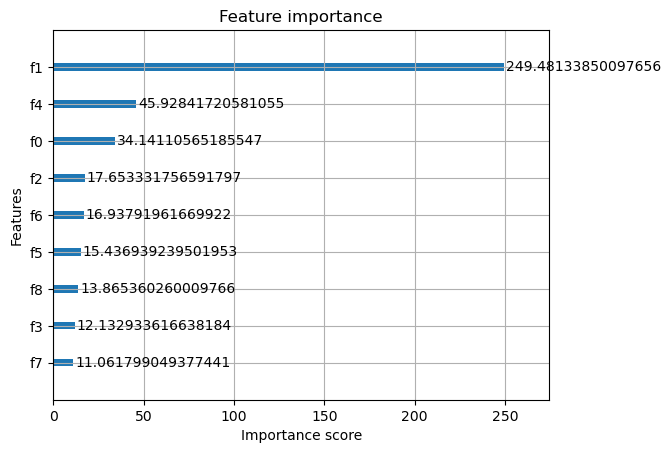

In [15]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.values.ravel())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define and train optimized XGBoost model for faster training
xgb_classifier = xgb.XGBClassifier(
    max_depth=7,
    n_estimators=50,
    learning_rate=0.2, ##INITIALLY 0.2
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_probs = xgb_classifier.predict_proba(X_test)
y_pred = y_pred_probs.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Model Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

#feature importance
xgb.plot_importance(xgb_classifier, importance_type='gain')
plt.show()



## 3.1.1 SHAP EXPLANATION (XG BOOST)

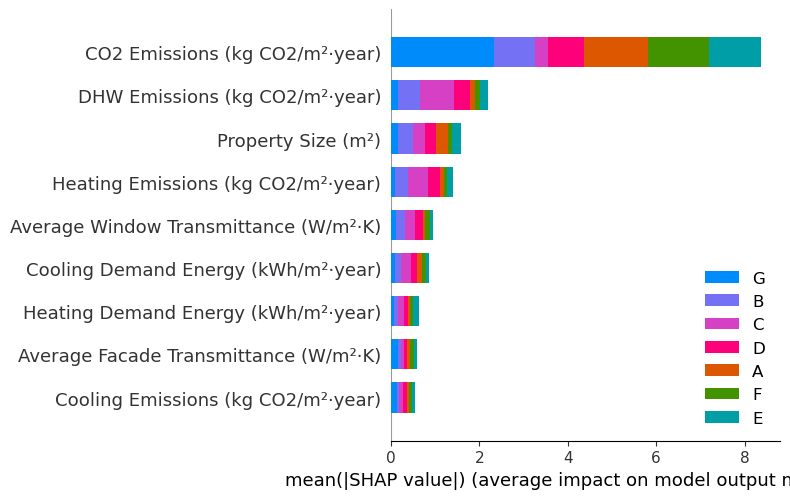

In [17]:
# SHAP explainability (optimized for speed)
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=selected_feature_name, plot_type='bar', class_names=label_encoder.classes_)

## 3.1.2 LIME EXPLANATION (XG BOOST)

In [19]:
# LIME explainability
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=selected_feature_name,
    class_names=label_encoder.classes_,
    discretize_continuous=True
)

# Provide explanations for fewer representative samples to speed up
for instance_idx in [0]:  # Reduced to a single instance for speed
    exp = explainer_lime.explain_instance(
        X_test[instance_idx],
        xgb_classifier.predict_proba,
        num_features=9,
        labels=(y_pred[instance_idx],)
    )
    exp.show_in_notebook()




## K-Means clustering

Optimal number of clusters: 9


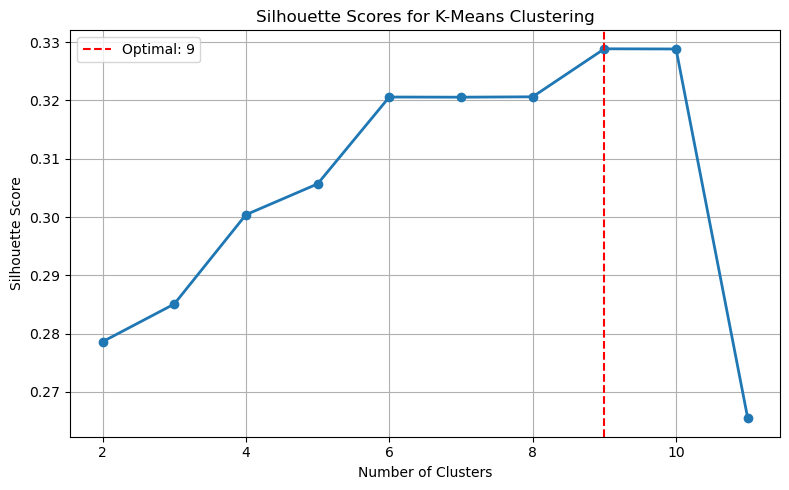

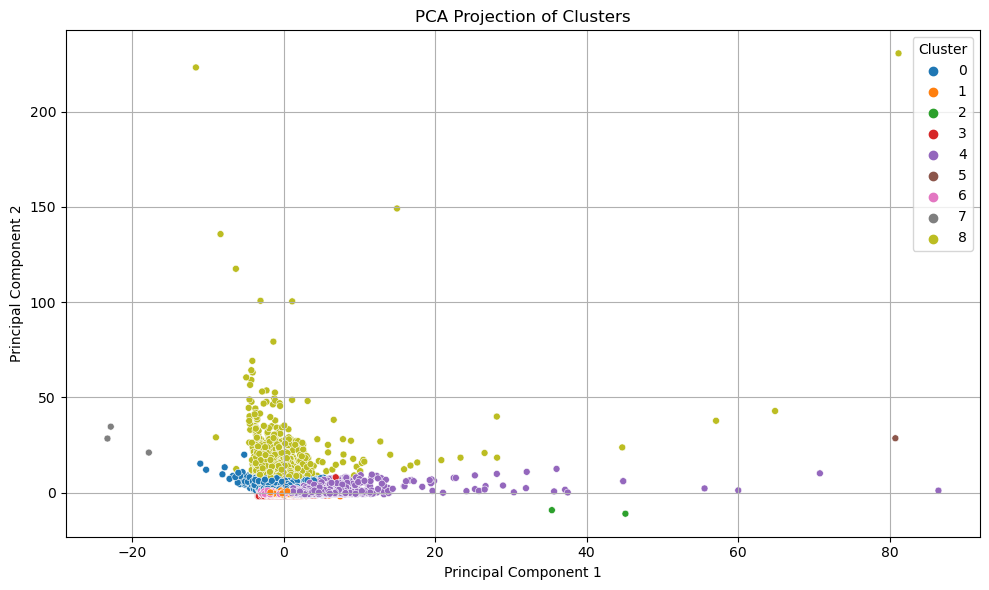

In [75]:
# Standardize features
X_clustering = StandardScaler().fit_transform(selected_df[selected_feature_name])

# Determine optimal number of clusters 
range_n_clusters = range(2, 12)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=5)
    labels = kmeans.fit_predict(X_clustering)
    score = silhouette_score(X_clustering, labels, sample_size=10000, random_state=42)
    silhouette_scores.append(score)

# Get optimal cluster count
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

# Final K-Means clustering
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=5)
cluster_labels = kmeans_final.fit_predict(X_clustering)
selected_df['Cluster'] = cluster_labels

#Silhouette score plot
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linewidth=2)
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal: {optimal_clusters}')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# PCA projection of clusters (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=selected_df['Cluster'], palette='tab10', s=25)
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()

# 1. Get cluster centroids

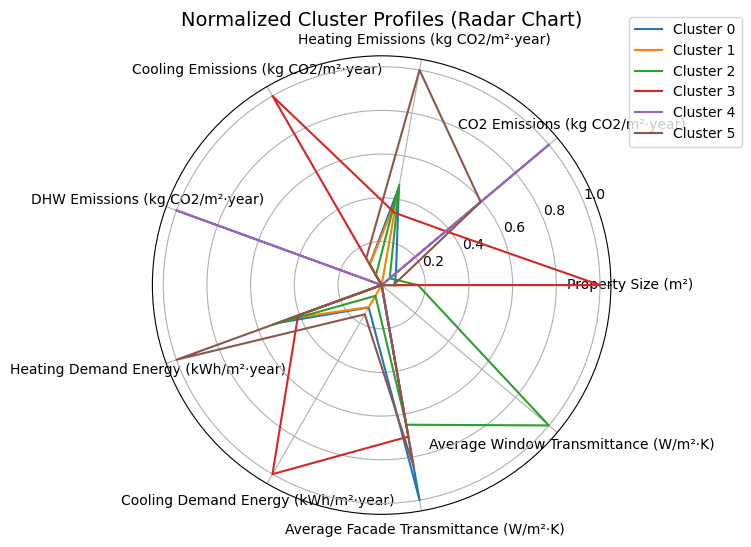

In [41]:

centroids = kmeans_final.cluster_centers_


centroids_original = scaler.inverse_transform(centroids) # Inverse scale to get original units

# radar chart
labels = np.array(selected_feature_name)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

centroids_norm = (centroids_original - centroids_original.min(axis=0)) / \
                 (centroids_original.max(axis=0) - centroids_original.min(axis=0))

plt.figure(figsize=(8, 8))
for i, row in enumerate(centroids_norm):
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

plt.xticks(angles[:-1], labels, color='black', size=10)
plt.title('Normalized Cluster Profiles (Radar Chart)', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

In [66]:
!pip install --user dice-ml

In [62]:
!pip install dice-ml

